In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import datetime as dt
# nltk.downloader.download('vader_lexicon')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

import string
import re

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leonardhl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
submissions_data = pd.read_csv("/Users/leonardhl/Documents/Sentiment-in-PD-Progression/parkinsons_submissions.csv")
comments_data = pd.read_csv("/Users/leonardhl/Documents/Sentiment-in-PD-Progression/parkinsons_comments.csv")

In [5]:
submissions_data = submissions_data[submissions_data["body"].notna()]
submissions_data = submissions_data[submissions_data["body"] != "[deleted]"]

submissions_data["body"] = [re.sub(r'[^\w\s]',' ', x) for x in submissions_data["body"]]
submissions_data["body"] = [re.sub(r'\n',' ', x) for x in submissions_data["body"]]
submissions_data["body"] = [re.sub(r'[0-9]',' ', x) for x in submissions_data["body"]]
submissions_data["body"] = [x.lower() for x in submissions_data["body"]]
submissions_data = submissions_data[[len(x) > 10 for x in submissions_data["body"]]]

In [6]:
from nltk.corpus import stopwords
sr = stopwords.words('english')

sr = sr + ["I", "My", "I'm", "like", "He", "know", "would", "get", "years", "really", "also", "The", "She", 
     "anyone", "I've", "It", "it", "We", "could", "he's", "someone", "https", "www", "com"]

clean_tokens = []
for comment in submissions_data["body"]:
    
    tokens = [t for t in comment.split()]
    
    for token in tokens:
        
        if token not in sr:
            
            if len(token) > 1:
            
                clean_tokens.append(token)


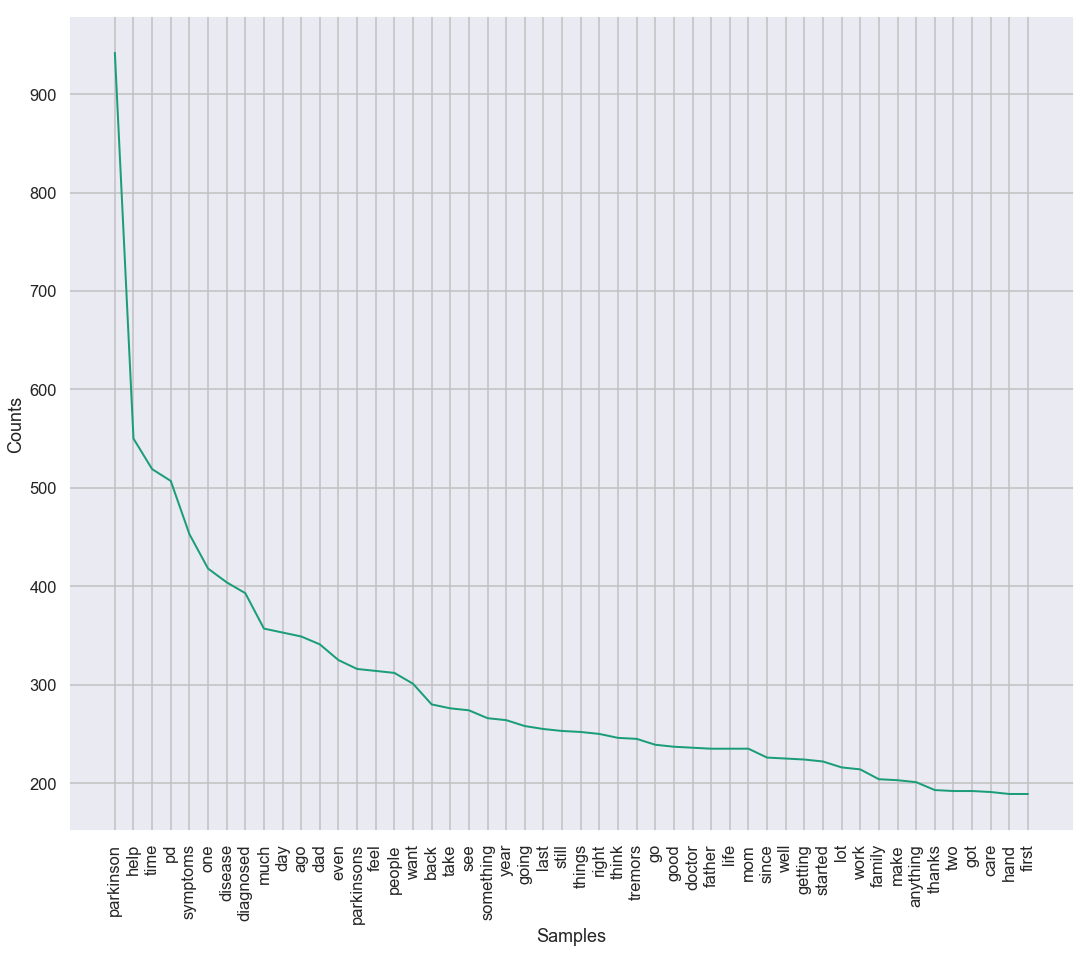

In [7]:
freq = nltk.FreqDist(clean_tokens)
plt.figure(figsize=(18, 15))
freq.plot(50, cumulative=False)

In [13]:
clean_df = pd.DataFrame(clean_tokens)
clean_df.columns = ['words']
clean_df

,words
0,hello
1,father
2,currently
3,parkinson
4,disease
5,diagnosed
6,currently
7,suffering
8,erectile
9,dysfunction


In [19]:
clean_df['words'] = clean_df['words'].astype(str)
words = clean_df.groupby("words")

words.describe()

ValueError: Cannot describe a DataFrame without columns

In [ ]:
# Start with one review:
text = 

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
comments_data = comments_data[comments_data["body"].notna()]
comments_data = comments_data[comments_data["body"] != "[deleted]"]

comments_data["body"] = [re.sub(r'[^\w\s]',' ', x) for x in comments_data["body"]]
comments_data["body"] = [re.sub(r'\n',' ', x) for x in comments_data["body"]]
comments_data["body"] = [re.sub(r'[0-9]',' ', x) for x in comments_data["body"]]
comments_data["body"] = [x.lower() for x in comments_data["body"]]
comments_data = comments_data[[len(x) > 10 for x in comments_data["body"]]]

In [29]:
clean_tokens_comment = []
for comment in comments_data["body"]:
    
    tokens = [t for t in comment.split()]
    
    for token in tokens:
        
        if token not in sr:
            
            if len(token) > 1:
            
                clean_tokens_comment.append(token)

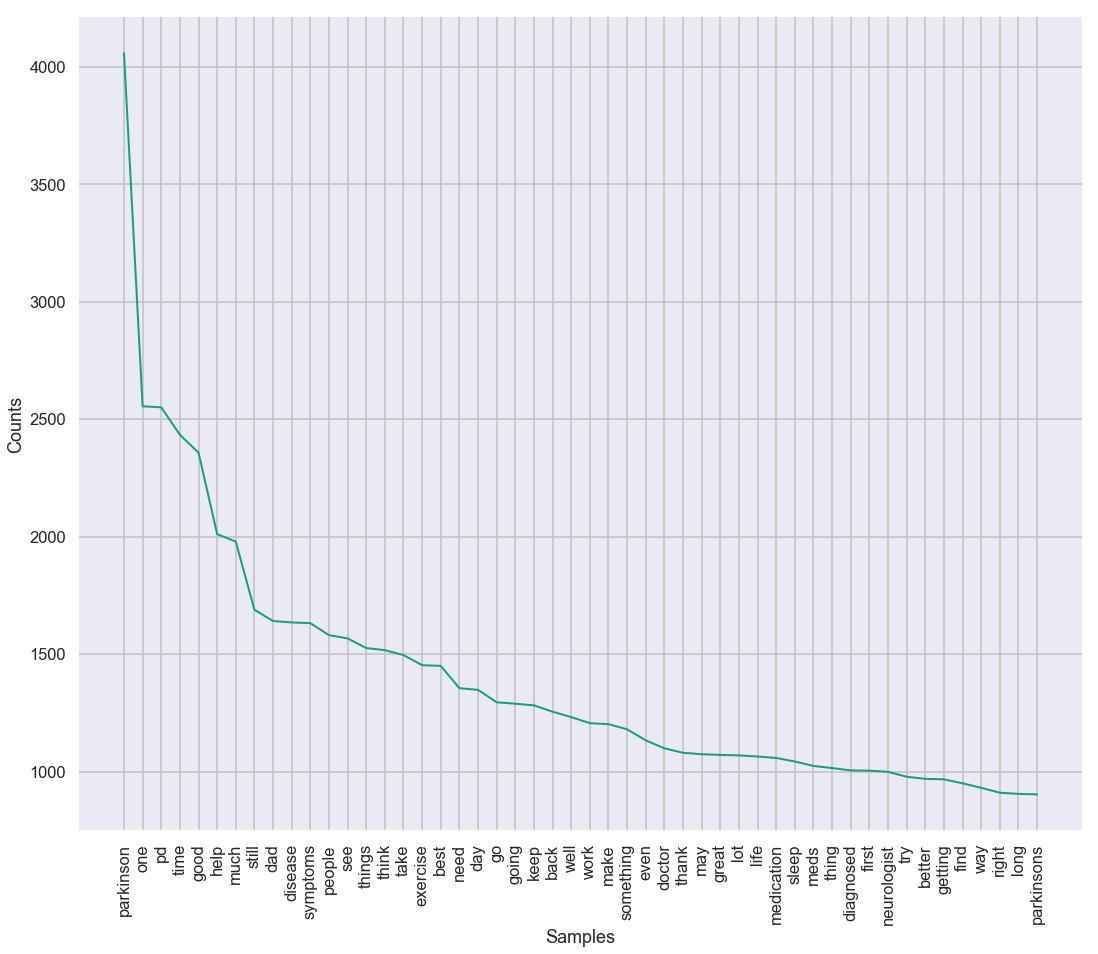

In [30]:
freq = nltk.FreqDist(clean_tokens_comment)
plt.figure(figsize=(18, 15))
freq.plot(50, cumulative=False)

In [57]:
## separate by year

submissions_data['timestamp'] =  pd.to_datetime(submissions_data['timestamp'], format='%Y%m%d %H:%M:%S.%f')

submissions_data.head()
len(submissions_data)

1224

In [68]:
year_2012 = submissions_data[(submissions_data['timestamp']>dt.date(2012,1,1)) & (submissions_data['timestamp']<dt.date(2012,12,31))] 
year_2012.head()
len(year_2012)

/Users/leonardhl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


1

In [50]:
year_2013 = submissions_data[(submissions_data['timestamp']>dt.date(2013,1,1)) & (submissions_data['timestamp']<dt.date(2013,12,31))] 
year_2013.head()
len(year_2013)

/Users/leonardhl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


4

In [49]:
year_2014 = submissions_data[(submissions_data['timestamp']>dt.date(2014,1,1)) & (submissions_data['timestamp']<dt.date(2014,12,31))] 
year_2014.head()
len(year_2014)

/Users/leonardhl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


51

In [51]:
year_2015 = submissions_data[(submissions_data['timestamp']>dt.date(2015,1,1)) & (submissions_data['timestamp']<dt.date(2015,12,31))] 
year_2015.head()
len(year_2015)

/Users/leonardhl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


74

In [52]:
year_2016  = submissions_data[(submissions_data['timestamp']>dt.date(2016,1,1)) & (submissions_data['timestamp']<dt.date(2016,12,31))] 
year_2016.head()
len(year_2016)

/Users/leonardhl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


107

In [53]:
year_2017  = submissions_data[(submissions_data['timestamp']>dt.date(2017,1,1)) & (submissions_data['timestamp']<dt.date(2017,12,31))] 
year_2017.head()
len(year_2017)

/Users/leonardhl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


170

In [54]:
year_2018  = submissions_data[(submissions_data['timestamp']>dt.date(2018,1,1)) & (submissions_data['timestamp']<dt.date(2018,12,31))] 
year_2018.head()
len(year_2018)

/Users/leonardhl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


268

In [55]:
year_2018  = submissions_data[(submissions_data['timestamp']>dt.date(2019,1,1)) & (submissions_data['timestamp']<dt.date(2019,12,19))] 
year_2018.head()
len(year_2018)

/Users/leonardhl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


544

In [56]:
544 + 268 + 170 + 107 + 74 +51 + 4 +1

1219

In [61]:
clean_tokens_comment = []
for comment in year_2012["body"]:
    
    tokens = [t for t in comment.split()]
    
    for token in tokens:
        
        if token not in sr:
            
            if len(token) > 1:
            
                clean_tokens_comment.append(token)

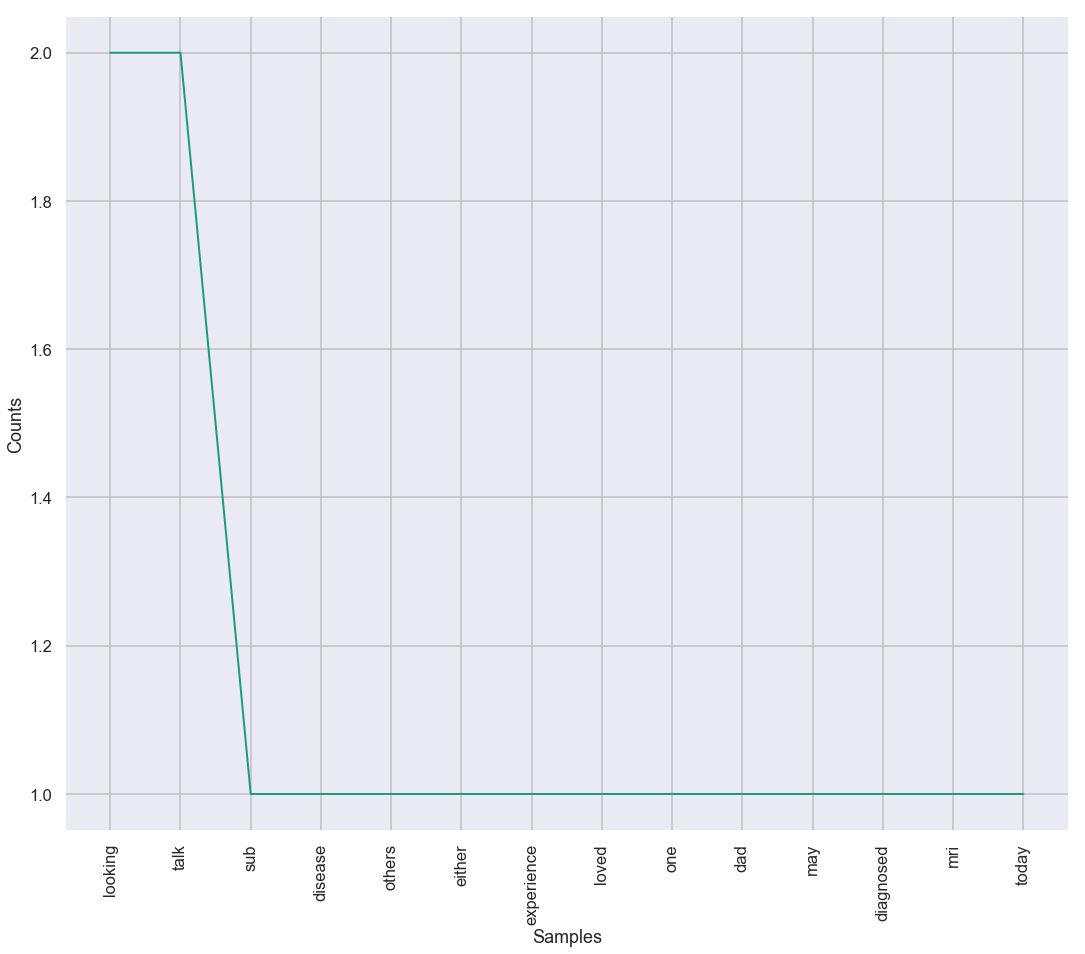

In [62]:
freq = nltk.FreqDist(clean_tokens_comment)
plt.figure(figsize=(18, 15))
freq.plot(50, cumulative=False)

In [63]:
clean_tokens_comment = []
for comment in year_2013["body"]:
    
    tokens = [t for t in comment.split()]
    
    for token in tokens:
        
        if token not in sr:
            
            if len(token) > 1:
            
                clean_tokens_comment.append(token)

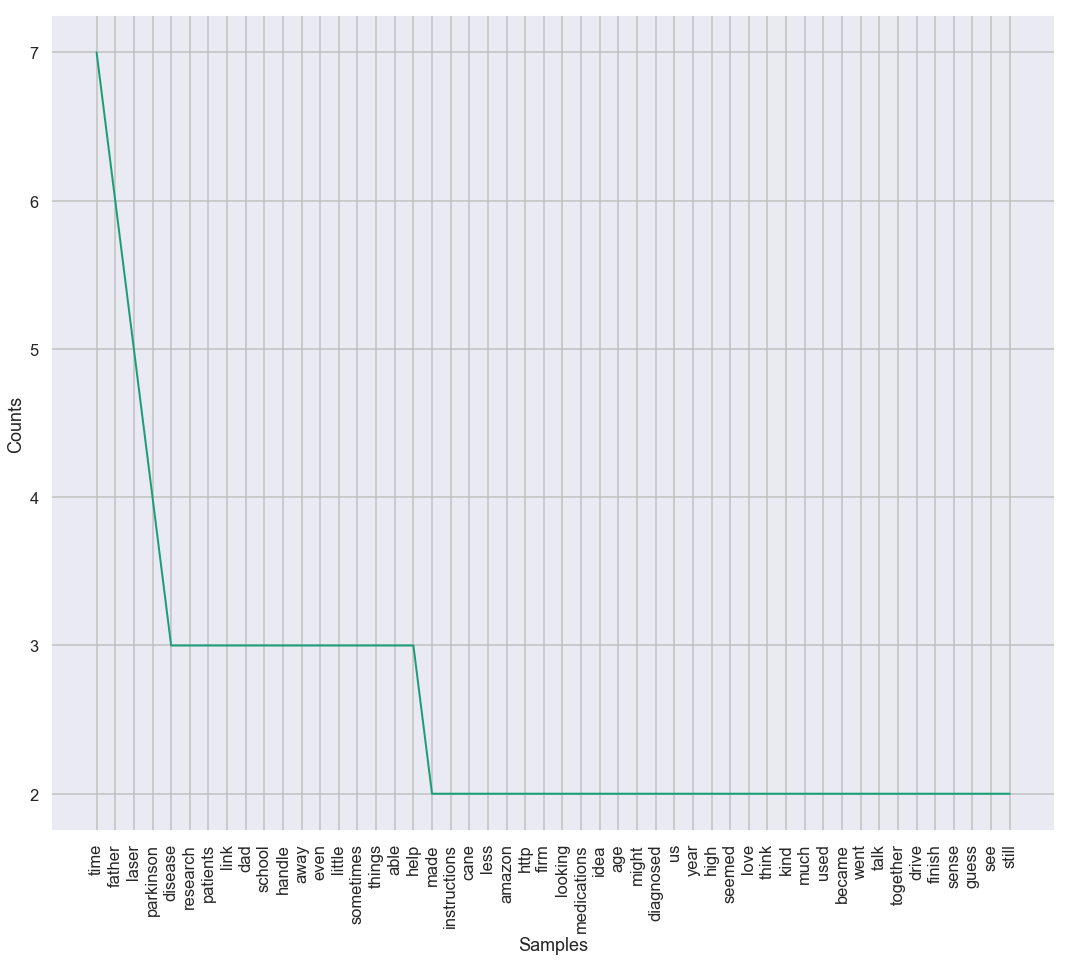

In [64]:
freq = nltk.FreqDist(clean_tokens_comment)
plt.figure(figsize=(18, 15))
freq.plot(50, cumulative=False)

In [65]:
clean_tokens_comment = []
for comment in year_2014["body"]:
    
    tokens = [t for t in comment.split()]
    
    for token in tokens:
        
        if token not in sr:
            
            if len(token) > 1:
            
                clean_tokens_comment.append(token)

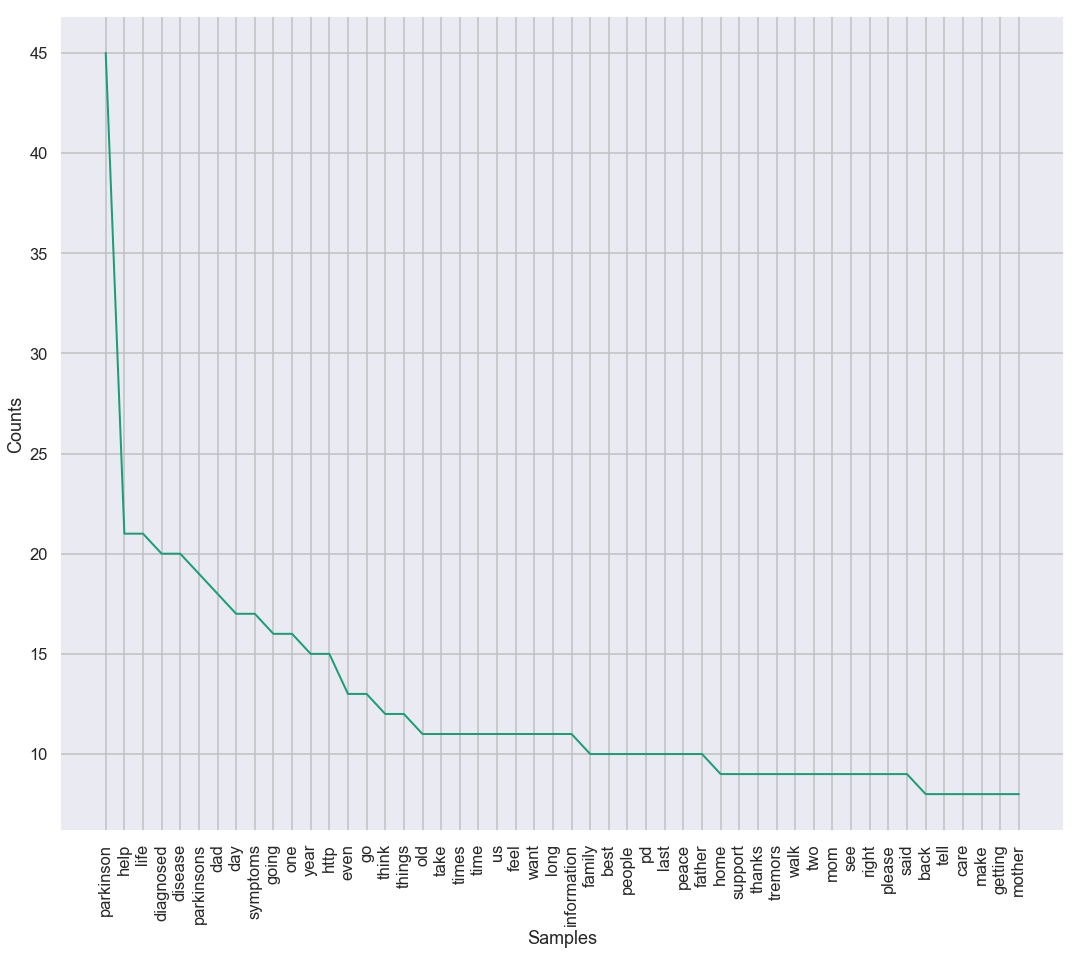

In [66]:
freq = nltk.FreqDist(clean_tokens_comment)
plt.figure(figsize=(18, 15))
freq.plot(50, cumulative=False)